# Kaggle 신용카드 사기 검출 (Google Drive Mount)  (Fraud_Detection_김혜빈)

[https://www.kaggle.com/mlg-ulb/creditcardfraud](https://www.kaggle.com/mlg-ulb/creditcardfraud)

## Credit Card Fraud Detection

- creditcard.csv (284,807 * 31)
- Class : 0 (정상), 1(사기)
- 사기 검출(Fraud Detection), 이상 탐지(Anomaly Detection)

# 1. Goolge Drive Mount

- 'creditCardFraud.zip' 파일을 구글드라이브에 업로드 후 진행
- pc에서 csv 읽는 것보다 속도가 빠르다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 마운트 결과 확인

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

-rw------- 1 root root 69155672 Mar  4 04:46 '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'


# 2. Data Preprocessing

> ## 1) Unzip 'creditCardFraud.zip'

- Colab 파일 시스템에 'creditcard.csv'파일 생성

In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/creditCardFraud.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip
  inflating: creditcard.csv          


- creditcard.csv 파일 확인

In [ ]:
!ls -l

total 147304
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
drwx------ 6 root root      4096 Mar  9 04:57 drive
drwxr-xr-x 1 root root      4096 Mar  5 14:37 sample_data


> ## 2) 데이터 읽어오기

- pandas DataFrame

In [ ]:
%%time
import pandas as pd
df = pd.read_csv('creditcard.csv')
df.info()
# V1 ~ V28 : 카드 사용자의 정보 (Standardization 된 상태)
# Amount : 신용카드 결제금액
# Class (y) : 분류, 0 = 정상, 1 = 사기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- 0 (정상) Class와 1 (사기) Class 개수

In [ ]:
df.Class.value_counts()
# 부정에 대해 알아야 한다. 1 = positive

0    284315
1       492
Name: Class, dtype: int64

- 0 (정상) Class와 1 (사기) Class 비율

In [ ]:
(df.Class.value_counts() / df.shape[0]) * 100
# df.shape[0] = 행 개수

0    99.827251
1     0.172749
Name: Class, dtype: float64

> ## 3) Time 열(Column) 삭제

In [ ]:
df.drop('Time', axis = 1, inplace = True)
df.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


> ## 4) train_test_split

- X (Input), y (Output) 지정

In [ ]:
X = df.iloc[:,:-1] # Class를 제외한 모든 변수
y = df.iloc[:,-1]  # Class 변수

X.shape, y.shape

((284807, 29), (284807,))

> ### (1) With 'Stratify'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2045)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

In [ ]:
print('Train_Data :', '\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :', '\n', (y_test.value_counts() / y_test.shape[0]) * 100)
# train, test의 부정(1) 비율이 같다.
# 본 예제처럼 비율이 한쪽으로 쏠려 있는 경우, 층화추출하는 것이 좋다.

Train_Data : 
 0    99.827451
1     0.172549
Name: Class, dtype: float64
Test_Data : 
 0    99.826785
1     0.173215
Name: Class, dtype: float64


# 3. EDA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.pairplot(df)
plt.show()
# V6, 7은 amount와 우상향 분포 경향이 있다.
# V11, 12, 17, 18은 Class에서 1(부정)의 비중이 높아 보인다.

Output hidden; open in https://colab.research.google.com to view.

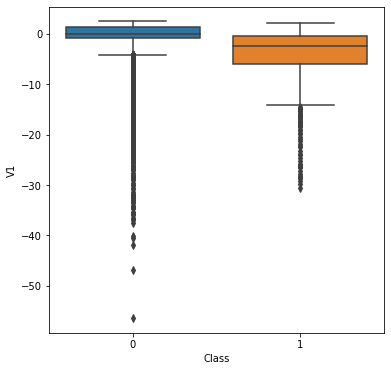

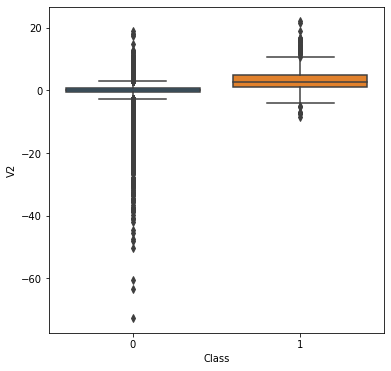

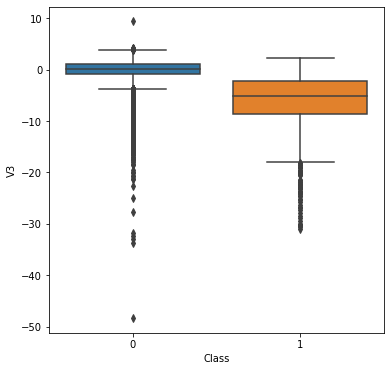

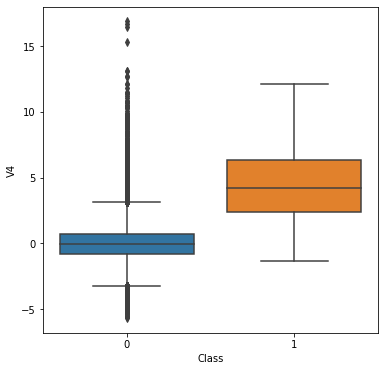

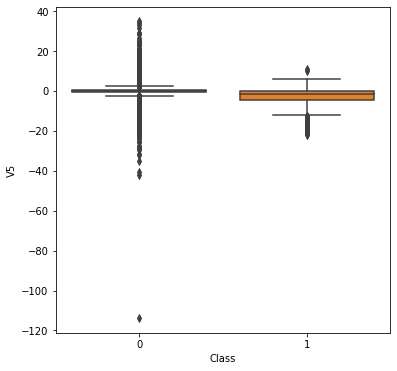

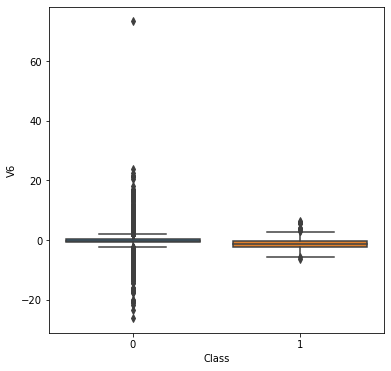

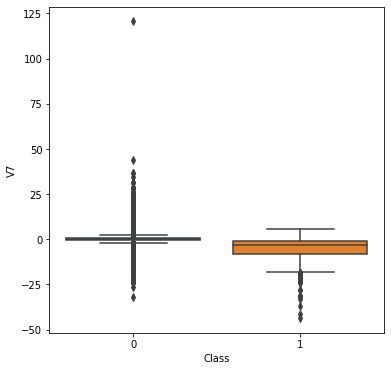

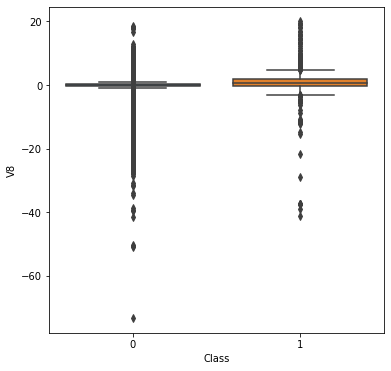

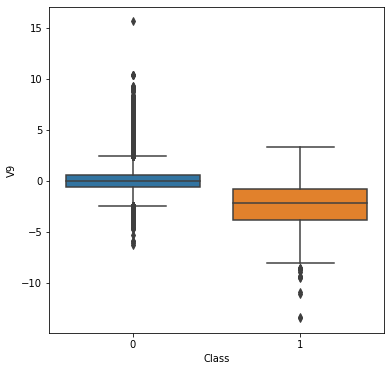

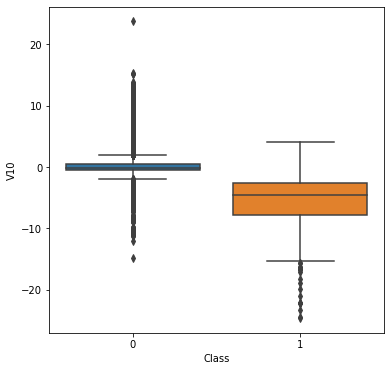

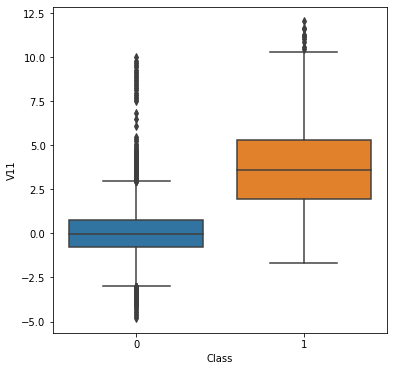

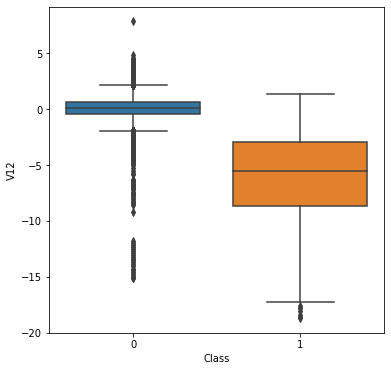

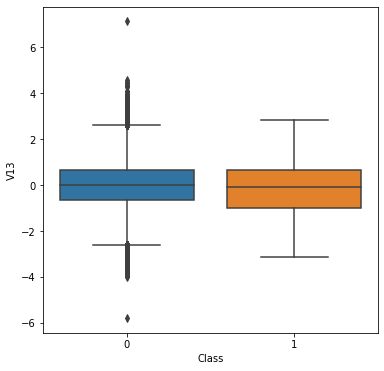

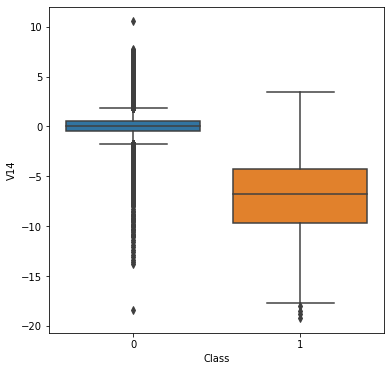

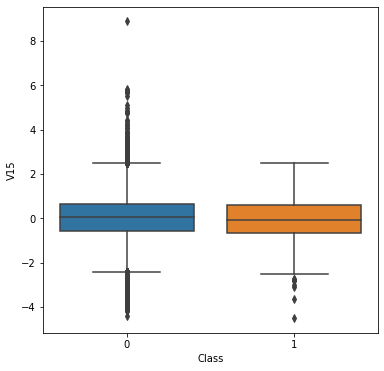

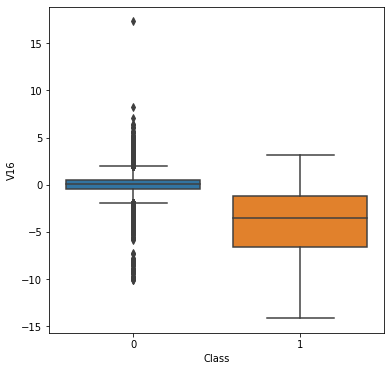

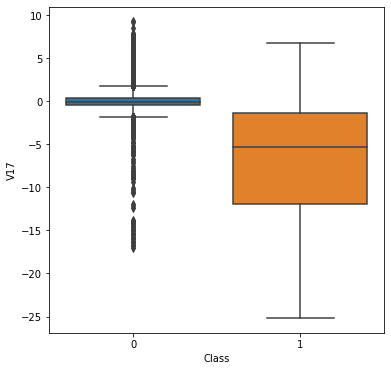

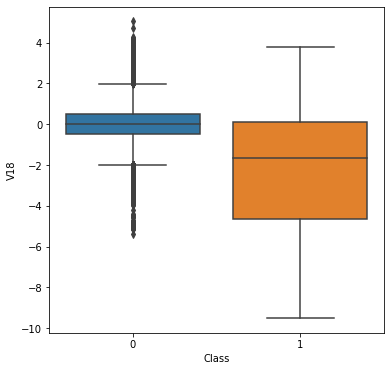

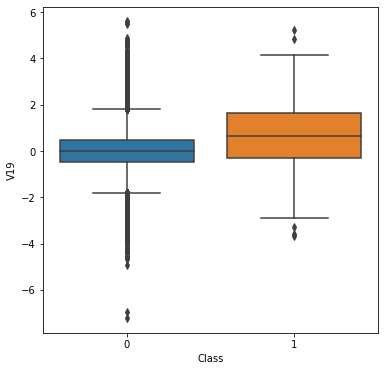

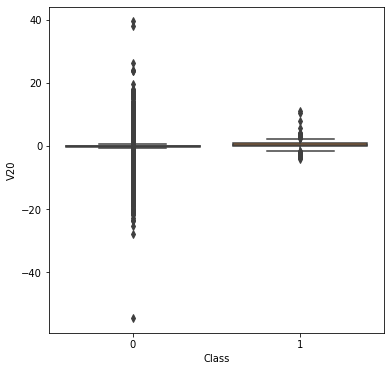

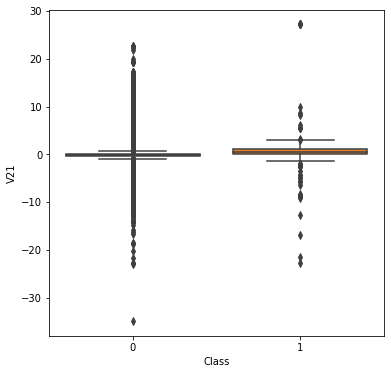

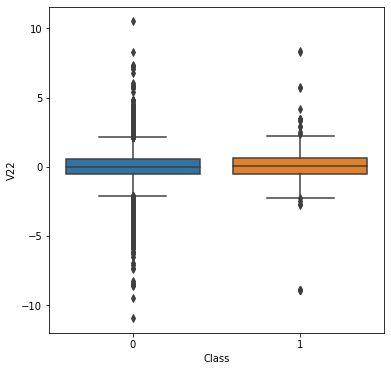

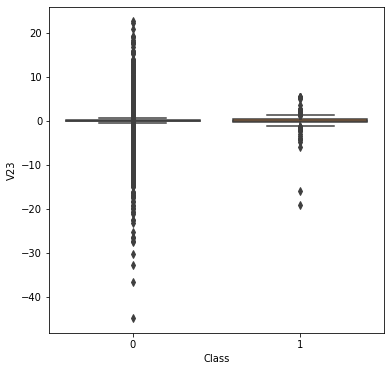

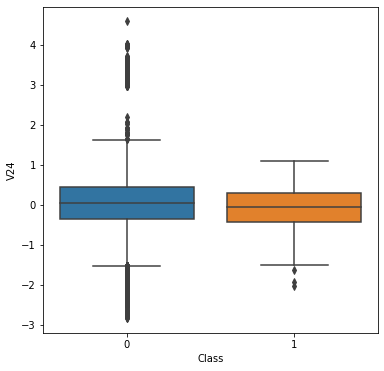

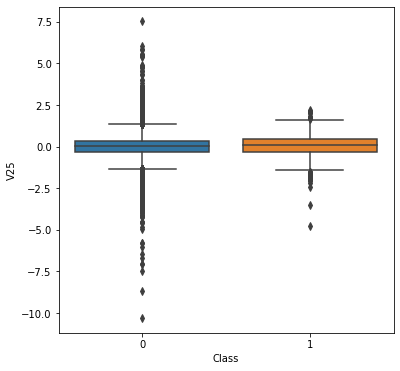

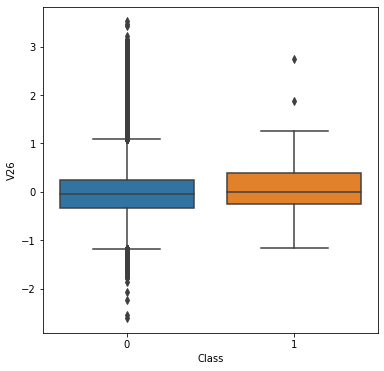

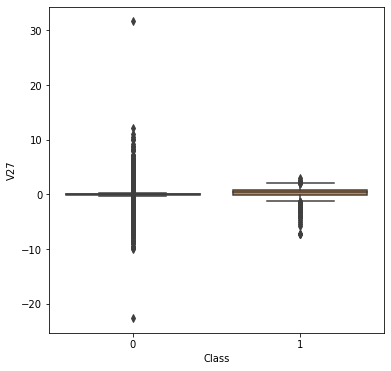

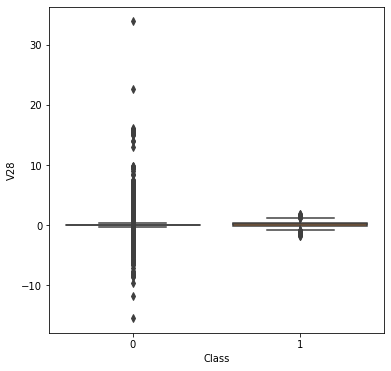

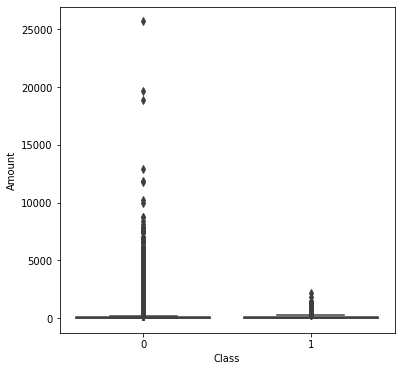

In [ ]:
for i in (X):
  plt.figure(figsize=(6, 6))
  sns.boxplot(x= 'Class', y= i, data = df)
  plt.show()
# V3, 4, 9, 10, 11, 12, 14, 16, 17, 18은 Class에 따라 분포에 차이가 있다. 

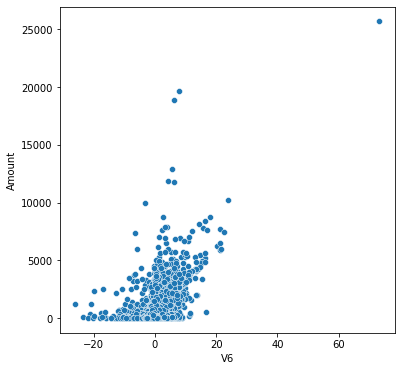

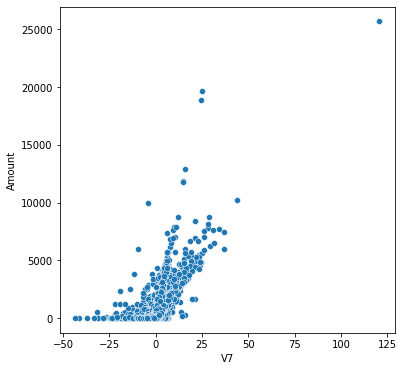

In [ ]:
for i in (df.V6, df.V7):
  plt.figure(figsize=(6, 6))
  sns.scatterplot(x= i, y = 'Amount', data = df)
  plt.show()

# 4. 모델 생성

- Logistic Regression
- K-Nearest Neighbors Classifier
- Random Forest Classifier


> ## 1) Logistic Regression

In [ ]:
%%time
c = [0.3, 0.5, 0.7, 0.9]

for j in range(len(c)):
  C = c[j]

  from sklearn.linear_model import LogisticRegression
  LR = LogisticRegression(C = C, 
                        penalty = 'l2',
                        n_jobs = -1)
  LR.fit(X_train, y_train)
  LR_ac = accuracy_score(y_test, LR.predict(X_test))
  LR_re = recall_score(y_test, LR.predict(X_test), pos_label = 1)
  LR_con = confusion_matrix(y_test, LR.predict(X_test), labels = [1, 0]) 

  print("Parameter : {} , Accuracy : {} , Recall : {}".format(C, LR_ac, LR_re))
  print('\n')
  print('LR_confusion_matrix : ', '\n', LR_con)
  print('\n\n')
  # C = 0.9일 때 재현율이 가장 높다.

Parameter : 0.3 , Accuracy : 0.9993797034280163 , Recall : 0.7567567567567568


LR_confusion_matrix :  
 [[  112    36]
 [   17 85278]]



Parameter : 0.5 , Accuracy : 0.9990519995786665 , Recall : 0.6891891891891891


LR_confusion_matrix :  
 [[  102    46]
 [   35 85260]]



Parameter : 0.7 , Accuracy : 0.9993562960102056 , Recall : 0.75


LR_confusion_matrix :  
 [[  111    37]
 [   18 85277]]



Parameter : 0.9 , Accuracy : 0.9993797034280163 , Recall : 0.7635135135135135


LR_confusion_matrix :  
 [[  113    35]
 [   18 85277]]



CPU times: user 1.79 s, sys: 881 ms, total: 2.68 s
Wall time: 1min 27s


In [ ]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 0.9, 
                        penalty = 'l2',
                        n_jobs = -1)
LR.fit(X_train, y_train)
LR_acc = accuracy_score(y_test, LR.predict(X_test))
LR_rec = recall_score(y_test, LR.predict(X_test), pos_label = 1)

> ## 2) K-Nearest Neighbors Classifier

In [ ]:
%%time
n = [3, 4, 5]

for j in range(len(c)):
  n_neighbors = n[j]
 
  from sklearn.neighbors import KNeighborsClassifier
  KNN = KNeighborsClassifier(n_neighbors = n_neighbors,
                            n_jobs = -1)
  KNN.fit(X_train, y_train)
  KNN_ac = accuracy_score(y_test, KNN.predict(X_test))
  KNN_re = recall_score(y_test, KNN.predict(X_test), pos_label = 1)
  KNN_con = confusion_matrix(y_test, KNN.predict(X_test), labels = [1, 0]) 

  print("Parameter : {} , Accuracy : {} , Recall : {}".format(n_neighbors, KNN_ac, KNN_re))
  print('\n')
  print('KNN_confusion_matrix : ', '\n', KNN_con)
  print('\n\n')
  # n_neighbors = 3일 때 재현율이 가장 높다.

Parameter : 3 , Accuracy : 0.9994382219725431 , Recall : 0.7297297297297297


KNN_confusion_matrix :  
 [[  108    40]
 [    8 85287]]



Parameter : 4 , Accuracy : 0.9993328885923949 , Recall : 0.6621621621621622


KNN_confusion_matrix :  
 [[   98    50]
 [    7 85288]]



Parameter : 5 , Accuracy : 0.9993211848834895 , Recall : 0.6824324324324325


KNN_confusion_matrix :  
 [[  101    47]
 [   11 85284]]





IndexError: ignored

In [ ]:

from sklearn.metrics import accuracy_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 3, 
                           n_jobs = -1)
KNN.fit(X_train, y_train)
KNN_acc = accuracy_score(y_test, KNN.predict(X_test))
KNN_rec = recall_score(y_test, KNN.predict(X_test), pos_label = 1)

> ## 3) Random Forest Classifier

In [ ]:
%%time
est = [100, 200]
fea = [4, 5]
dep = [3, 4]

for i in est:
  for j in fea:
    for k in dep:
      parameter = (i, j, k)
      from sklearn.ensemble import RandomForestClassifier
      RF = RandomForestClassifier(criterion = 'entropy',
                            n_estimators = i,
                            max_features = j,
                            max_depth = k,
                            random_state = 2045,
                            n_jobs = -1)
      RF.fit(X_train, y_train)
      RF_ac = accuracy_score(y_test, RF.predict(X_test))
      RF_re = recall_score(y_test, RF.predict(X_test), pos_label = 1)
      RF_con = confusion_matrix(y_test, RF.predict(X_test), labels = [1, 0])
      print("Parameter : {} , Accuracy : {} , Recall : {}".format(parameter, RF_ac, RF_re))
      print('\n')
      print('KNN_confusion_matrix : ', '\n', RF_con)
      print('\n\n')
# n_estimators : 100, max_features : 5, max_depth : 4 일 때 recall이 공동으로 가장 높다.
# n_estimators : 100, max_features : 4, max_depth : 4 일 때 recall이 공동으로 가장 높다.
# n_estimators : 100, max_features : 5, max_depth : 4 일 때 recall이 공동으로 가장 높다.

Parameter : (100, 4, 3) , Accuracy : 0.9993328885923949 , Recall : 0.7297297297297297


KNN_confusion_matrix :  
 [[  108    40]
 [   17 85278]]



Parameter : (100, 4, 4) , Accuracy : 0.9994148145547324 , Recall : 0.7905405405405406


KNN_confusion_matrix :  
 [[  117    31]
 [   19 85276]]



Parameter : (100, 5, 3) , Accuracy : 0.9993914071369217 , Recall : 0.7702702702702703


KNN_confusion_matrix :  
 [[  114    34]
 [   18 85277]]



Parameter : (100, 5, 4) , Accuracy : 0.9994265182636377 , Recall : 0.7972972972972973


KNN_confusion_matrix :  
 [[  118    30]
 [   19 85276]]



Parameter : (200, 4, 3) , Accuracy : 0.9993445923013002 , Recall : 0.7364864864864865


KNN_confusion_matrix :  
 [[  109    39]
 [   17 85278]]



Parameter : (200, 4, 4) , Accuracy : 0.9994499256814484 , Recall : 0.7972972972972973


KNN_confusion_matrix :  
 [[  118    30]
 [   17 85278]]



Parameter : (200, 5, 3) , Accuracy : 0.9993445923013002 , Recall : 0.7432432432432432


KNN_confusion_matrix :  

In [ ]:
%%time
from sklearn.metrics import accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion = 'entropy',
                            n_estimators = 100,
                            max_features = 5,
                            max_depth = 4,
                            random_state = 2045,
                            n_jobs = -1)
RF.fit(X_train, y_train)
RF_acc = accuracy_score(y_test, RF.predict(X_test))
RF_rec = recall_score(y_test, RF.predict(X_test), pos_label = 1)

CPU times: user 2min 11s, sys: 212 ms, total: 2min 11s
Wall time: 1min 7s


> Feature Importance

In [ ]:
RF.feature_importances_

array([0.00174493, 0.01341048, 0.03106965, 0.04137872, 0.00721473,
       0.00360315, 0.02005716, 0.00310236, 0.02685696, 0.12169498,
       0.08824284, 0.08477176, 0.00043673, 0.20665707, 0.00073381,
       0.05333815, 0.22687692, 0.03801511, 0.00217239, 0.00383731,
       0.00916695, 0.00150222, 0.00133728, 0.00114022, 0.00051626,
       0.00349237, 0.00212949, 0.00361555, 0.00188446])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


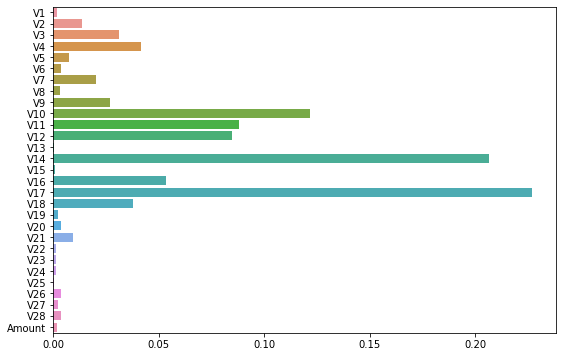

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9, 6))
sns.barplot(RF.feature_importances_,
            ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount'])
plt.show()

# 결과

In [ ]:
import pandas as pd
df_result = pd.DataFrame({
                          "Model" : ['LR', 'KNN', 'RF'],
                          "Accuracy" : [LR_acc, KNN_ac, RF_acc],
                          "Recall" : [LR_rec, KNN_rec, RF_rec]})
                          
df_result.sort_values(by=['Recall'], axis=0, ascending=False)
# Random Forest Classifier가 적합한 모델이라고 판단한다.

,Model,Accuracy,Recall
2,RF,0.999427,0.797297
0,LR,0.999380,0.763514
1,KNN,0.999321,0.729730


- 아쉬운 점 : 다른 분류 모델을 더 적용하지 못했다.